## Try Tifa sample code

In [1]:
from tifascore import get_llama2_pipeline, get_llama2_question_and_answers

pipeline = get_llama2_pipeline("tifa-benchmark/llama2_tifa_question_generation")

llama2_questions = get_llama2_question_and_answers(pipeline, "Three cats and two dogs sitting on the grass.")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

D:\Documents\workspaces\PyCharm projects\ExplainImageGen\vision_venv\lib\site-packages\transformers\models\llama\modeling_llama.py:648: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [2]:
llama2_questions

[{'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'cats',
  'question': 'what animals are in the picture?',
  'choices': ['cats', 'dogs', 'birds', 'fish'],
  'answer': 'cats',
  'element_type': 'animal/human'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'dogs',
  'question': 'are there dogs?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'animal/human'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'dogs',
  'question': 'what animals are in the picture?',
  'choices': ['dogs', 'cats', 'birds', 'fish'],
  'answer': 'dogs',
  'element_type': 'animal/human'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'grass',
  'question': 'is there grass?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'object'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'grass',
  'question': 'what is the animals sitting on?',
  'c

In [1]:
import ast

ll = ast.literal_eval("""
[{'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'cats',
  'question': 'what animals are in the picture?',
  'choices': ['cats', 'dogs', 'birds', 'fish'],
  'answer': 'cats',
  'element_type': 'animal/human'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'dogs',
  'question': 'are there dogs?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'animal/human'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'dogs',
  'question': 'what animals are in the picture?',
  'choices': ['dogs', 'cats', 'birds', 'fish'],
  'answer': 'dogs',
  'element_type': 'animal/human'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'grass',
  'question': 'is there grass?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'object'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'grass',
  'question': 'what is the animals sitting on?',
  'choices': ['grass', 'leaves', 'twigs', 'sand'],
  'answer': 'grass',
  'element_type': 'object'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'sitting',
  'question': 'are the animals sitting?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'activity'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'sitting',
  'question': 'what are the animals doing?',
  'choices': ['sitting', 'standing', 'running', 'jumping'],
  'answer': 'sitting',
  'element_type': 'activity'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'three',
  'question': 'are there three cats?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'counting'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'three',
  'question': 'how many cats are in the picture?',
  'choices': ['1', '2', '3', '4'],
  'answer': '3',
  'element_type': 'counting'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'two',
  'question': 'are there two dogs?',
  'choices': ['yes', 'no'],
  'answer': 'yes',
  'element_type': 'counting'},
 {'caption': 'Three cats and two dogs sitting on the grass.',
  'element': 'two',
  'question': 'how many dogs are in the picture?',
  'choices': ['1', '2', '3', '4'],
  'answer': '2',
  'element_type': 'counting'}]""")

In [2]:
from tifascore import get_question_and_answers, filter_question_and_answers, UnifiedQAModel, tifa_score_single, VQAModel
import openai

openai.api_key = "[Your OpenAI Key]"
unifiedqa_model = UnifiedQAModel("allenai/unifiedqa-v2-t5-large-1363200")
#vqa_model = VQAModel("mplug-large")
#vqa_model = VQAModel("Salesforce/blip-vqa-base")
vqa_model = VQAModel("blip-base")
    
    
img_path = "../tifa/sample/drawbench_52.jpg"
text = "Three cats and two dogs sitting on the grass."
    
# Generate questions with GPT-3.5-turbo
#gpt3_questions = get_question_and_answers(text)
    
# Filter questions with UnifiedQA
filtered_questions = filter_question_and_answers(unifiedqa_model, ll)
    
# See the questions
print(filtered_questions)

# calucluate TIFA score
result = tifa_score_single(vqa_model, filtered_questions, img_path)
print(f"TIFA score is {result['tifa_score']}")   # 0.33
print(result)

Loading blip-base...
Finish loading blip-base
Using SBERT on GPU
[{'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'dogs', 'question': 'are there dogs?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'animal/human'}, {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'grass', 'question': 'is there grass?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'grass', 'question': 'what is the animals sitting on?', 'choices': ['grass', 'leaves', 'twigs', 'sand'], 'answer': 'grass', 'element_type': 'object'}, {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'sitting', 'question': 'are the animals sitting?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity'}, {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'three', 'question': 'are there three cats?', 'choices': ['yes', 'no'], 'an

100%|██████████| 8/8 [00:12<00:00,  1.58s/it]

TIFA score is 0.625
{'tifa_score': 0.625, 'question_details': {'are there dogs?': {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'dogs', 'question': 'are there dogs?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'animal/human', 'free_form_vqa': 'no', 'multiple_choice_vqa': 'no', 'scores': 0}, 'is there grass?': {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'grass', 'question': 'is there grass?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object', 'free_form_vqa': 'yes', 'multiple_choice_vqa': 'yes', 'scores': 1}, 'what is the animals sitting on?': {'caption': 'Three cats and two dogs sitting on the grass.', 'element': 'grass', 'question': 'what is the animals sitting on?', 'choices': ['grass', 'leaves', 'twigs', 'sand'], 'answer': 'grass', 'element_type': 'object', 'free_form_vqa': 'grass', 'multiple_choice_vqa': 'grass', 'scores': 1}, 'are the animals sitting?': {'caption': 'Three cats and two dogs sitt

In [7]:
result.keys()

dict_keys(['tifa_score', 'question_details'])

## Load the generated Llama questions and filter them 

In [3]:
import pandas as pd
from tqdm import tqdm

ls_bilder = pd.read_csv("sampled_data_fixed.csv")
tifa_meta = pd.DataFrame(columns=["name", "description", "llama2_questions"])
tifa_meta

,name,description,llama2_questions


In [4]:
import ast

with open("tifa_scores_llama2_questions.txt", "r") as f:
    questions = f.readlines()
#" ".join([q.strip() for q in questions])
llama2_questions = ast.literal_eval(" ".join([q.strip() for q in questions]))
print(llama2_questions[0])

[{'caption': 'This is a chronic condition in women where the uterine lining grows outside the uterine cavity and inflammation occurs. In the picture: A woman is depicted naked. Her ovaries, uterus, and lungs are marked. The organs show signs of inflammation.', 'element': 'woman', 'question': 'who is depicted naked?', 'choices': ['woman', 'man', 'boy', 'girl'], 'answer': 'woman', 'element_type': 'animal/human'}, {'caption': 'This is a chronic condition in women where the uterine lining grows outside the uterine cavity and inflammation occurs. In the picture: A woman is depicted naked. Her ovaries, uterus, and lungs are marked. The organs show signs of inflammation.', 'element': 'uterine lining', 'question': 'is there a uterine lining?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': 'This is a chronic condition in women where the uterine lining grows outside the uterine cavity and inflammation occurs. In the picture: A woman is depicted naked. Her ovar

In [5]:
for question in llama2_questions:
    caption = question[0]['caption']
    ls_data = ls_bilder[ls_bilder.english_description == caption]
    entry = pd.DataFrame.from_dict({"name": ls_data["english_name"], "description": caption, "llama2_questions": [question]})
    tifa_meta = pd.concat([tifa_meta, entry], ignore_index=True)
tifa_meta

,name,description,llama2_questions
0,Endometriosis,This is a chronic condition in women where the...,[{'caption': 'This is a chronic condition in w...
1,Exchange on the Internet,"In the middle, there is a globe depicted. Arou...","[{'caption': 'In the middle, there is a globe ..."
2,Despair,A woman covers her face with both hands. She c...,[{'caption': 'A woman covers her face with bot...
3,Long Cane,"An image of a long cane, unfolded and folded.","[{'caption': 'An image of a long cane, unfolde..."
4,Induction Loop,The picture shows three people at a table. A l...,[{'caption': 'The picture shows three people a...
...,...,...,...
75,Difficulty Concentrating,A man ties his sports shoes. He has several th...,[{'caption': 'A man ties his sports shoes. He ...
76,Empathy,A woman puts a comforting hand on a man's shou...,[{'caption': 'A woman puts a comforting hand o...
77,Poor Memory Performance,A woman holds her forehead thoughtfully. Quest...,[{'caption': 'A woman holds her forehead thoug...
78,Being Deaf,Depicted are two persons facing each other. On...,[{'caption': 'Depicted are two persons facing ...


In [7]:
from tifascore import filter_question_and_answers, UnifiedQAModel

#unifiedqa_model = UnifiedQAModel("allenai/unifiedqa-v2-t5-large-1363200")

for i, row in tqdm(tifa_meta.iterrows(), total=len(tifa_meta)):
    filtered_questions = filter_question_and_answers(unifiedqa_model, row["llama2_questions"])
    tifa_meta.at[i, "filtered_questions"] = [filtered_questions]
tifa_meta["filtered_questions"] = tifa_meta["filtered_questions"].apply(lambda x: x[0])
tifa_meta

100%|██████████| 80/80 [02:08<00:00,  1.61s/it]


,name,description,llama2_questions,filtered_questions
0,Endometriosis,This is a chronic condition in women where the...,[{'caption': 'This is a chronic condition in w...,[[{'caption': 'This is a chronic condition in ...
1,Exchange on the Internet,"In the middle, there is a globe depicted. Arou...","[{'caption': 'In the middle, there is a globe ...","[[{'caption': 'In the middle, there is a globe..."
2,Despair,A woman covers her face with both hands. She c...,[{'caption': 'A woman covers her face with bot...,[[{'caption': 'A woman covers her face with bo...
3,Long Cane,"An image of a long cane, unfolded and folded.","[{'caption': 'An image of a long cane, unfolde...","[[{'caption': 'An image of a long cane, unfold..."
4,Induction Loop,The picture shows three people at a table. A l...,[{'caption': 'The picture shows three people a...,[[{'caption': 'The picture shows three people ...
...,...,...,...,...
75,Difficulty Concentrating,A man ties his sports shoes. He has several th...,[{'caption': 'A man ties his sports shoes. He ...,[[{'caption': 'A man ties his sports shoes. He...
76,Empathy,A woman puts a comforting hand on a man's shou...,[{'caption': 'A woman puts a comforting hand o...,[[{'caption': 'A woman puts a comforting hand ...
77,Poor Memory Performance,A woman holds her forehead thoughtfully. Quest...,[{'caption': 'A woman holds her forehead thoug...,[[{'caption': 'A woman holds her forehead thou...
78,Being Deaf,Depicted are two persons facing each other. On...,[{'caption': 'Depicted are two persons facing ...,[[{'caption': 'Depicted are two persons facing...


In [11]:
tifa_meta.to_csv("tifa_metadata.csv", index=False)

## Evaluate the Tifa scores

In [1]:
import pandas as pd

tifa_scores = pd.read_csv("tifa_scores_blip.csv")
tifa_scores.groupby(["model"])["tifa_score"].mean()

model
DALLE-3       0.734617
Midjourney    0.773151
SD1_4         0.620149
SD2_1_base    0.699165
Wuerstchen    0.670497
artbreeder    0.708459
references    0.771816
Name: tifa_score, dtype: float64

In [1]:
import pandas as pd

tifa_scores_mplug = pd.read_csv("tifa_scores_mplug.csv")
tifa_scores_mplug.groupby(["model"])["tifa_score"].mean()

model
DALLE-3       0.748720
Midjourney    0.782493
SD1_4         0.582517
SD2_1_base    0.683051
SD_3          0.780986
Wuerstchen    0.646882
artbreeder    0.702576
references    0.842083
Name: tifa_score, dtype: float64

In [1]:
import pandas as pd

tifa_scores = pd.read_csv("tifa_scores_git.csv")
tifa_scores.groupby(["model"])["tifa_score"].mean()

model
DALLE-3       0.671098
Midjourney    0.694562
SD1_4         0.504959
SD2_1_base    0.587815
SD_3          0.701389
Wuerstchen    0.577205
artbreeder    0.635838
references    0.702067
Name: tifa_score, dtype: float64

In [2]:
import ast
from statistics import mean

tifa_humans = []
tifa_elses = []
tifa_alls = []
tifa_official = []
for _, row in tifa_scores_mplug.iterrows():
    tifa_human = 0.0
    tifa_else = 0.0
    tifa_all = []
    if row["question_details"] ==  "{'all_black': True}":
        num_questions = 1
        tifa_alls.append(0.0)
    else:
        question_details = ast.literal_eval(row["question_details"])
        for _, question_detail in question_details.items():
            tifa_all.append(question_detail["scores"])
            if question_detail["element_type"] == "animal/human":
                tifa_human += question_detail["scores"]
            else: 
                tifa_else += question_detail["scores"]
        num_questions = len(question_details)
        tifa_alls.append(mean(tifa_all))
    tifa_humans.append(tifa_human / num_questions)
    tifa_elses.append(tifa_else / num_questions)
    tifa_official.append(row["tifa_score"])

In [5]:
[a - o for a, o in zip(tifa_alls, tifa_official)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.551115123125783e-17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.551115123125783e-17,
 5.551115123125783e-17,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

## Tifa element types

In [36]:
import pandas as pd
import ast

tifa_scores_mplug = pd.read_csv("tifa_scores_mplug.csv")
#tifa_scores_mplug = tifa_scores_mplug[tifa_scores_mplug.question_details != "{'all_black': True}"]
#tifa_scores_mplug["question_details"] = tifa_scores_mplug["question_details"].apply(lambda x: ast.literal_eval(x)) 

In [40]:
tifa_scores_mplug.groupby(["model"]).count()

,name,id,description,tifa_score,question_details
model,,,,,
DALLE-3,297,297,297,297,297
Midjourney,320,320,320,320,320
SD1_4,320,320,320,320,320
SD2_1_base,320,320,320,320,320
SD_3,320,320,320,320,320
Wuerstchen,320,320,320,320,320
artbreeder,320,320,320,320,320
references,80,80,80,80,80


In [41]:
tifa_scores_mplug

,name,model,id,description,tifa_score,question_details
0,Endometriosis,DALLE-3,0,This is a chronic condition in women where the...,0.00,{'all_black': True}
1,Endometriosis,DALLE-3,1,This is a chronic condition in women where the...,0.00,{'all_black': True}
2,Endometriosis,DALLE-3,2,This is a chronic condition in women where the...,0.00,{'all_black': True}
3,Endometriosis,DALLE-3,3,This is a chronic condition in women where the...,0.00,{'all_black': True}
4,Exchange on the Internet,DALLE-3,0,"In the middle, there is a globe depicted. Arou...",1.00,{'are there individuals depicted?': {'caption'...
...,...,...,...,...,...,...
2292,Being Deaf,SD_3,3,Depicted are two persons facing each other. On...,0.80,{'is one person communicating in sign language...
2293,Being Blind,SD_3,0,Depicted is a man holding a long cane in his h...,0.50,{'is the man holding a cane?': {'caption': 'De...
2294,Being Blind,SD_3,1,Depicted is a man holding a long cane in his h...,0.50,{'is the man holding a cane?': {'caption': 'De...
2295,Being Blind,SD_3,2,Depicted is a man holding a long cane in his h...,0.75,{'is the man holding a cane?': {'caption': 'De...


In [37]:
tifa_scores_mplug[tifa_scores_mplug.question_details == "{'all_black': True}"]

,name,model,id,description,tifa_score,question_details
0,Endometriosis,DALLE-3,0,This is a chronic condition in women where the...,0.0,{'all_black': True}
1,Endometriosis,DALLE-3,1,This is a chronic condition in women where the...,0.0,{'all_black': True}
2,Endometriosis,DALLE-3,2,This is a chronic condition in women where the...,0.0,{'all_black': True}
3,Endometriosis,DALLE-3,3,This is a chronic condition in women where the...,0.0,{'all_black': True}
69,Digestive Tract,DALLE-3,0,Illustration of a naked man. The small and lar...,0.0,{'all_black': True}
70,Digestive Tract,DALLE-3,1,Illustration of a naked man. The small and lar...,0.0,{'all_black': True}
71,Digestive Tract,DALLE-3,2,Illustration of a naked man. The small and lar...,0.0,{'all_black': True}
72,Digestive Tract,DALLE-3,3,Illustration of a naked man. The small and lar...,0.0,{'all_black': True}
127,Colonoscopy,DALLE-3,0,A woman lies sideways on an examination couch ...,0.0,{'all_black': True}
128,Colonoscopy,DALLE-3,1,A woman lies sideways on an examination couch ...,0.0,{'all_black': True}


In [2]:
element_types = set()
for i, row in tifa_scores_mplug.iterrows():
    for _, question_details in row["question_details"].items():
        element_types.add(question_details["element_type"])
element_types

{'activity',
 'animal/human',
 'attribute',
 'color',
 'counting',
 'food',
 'location',
 'object',
 'other',
 'shape',
 'spatial'}

In [16]:
elements_dict = {e: 0 for e in element_types}
model_elements_score = {
    "SD1_4": elements_dict.copy(),
    "SD2_1_base": elements_dict.copy(),
    "SD_3": elements_dict.copy(),
    "Wuerstchen": elements_dict.copy(),
    "DALLE-3": elements_dict.copy(),
    "Midjourney": elements_dict.copy(),
    "artbreeder": elements_dict.copy(),
    "references": elements_dict.copy()
}
model_elements_count = {
    "SD1_4": elements_dict.copy(),
    "SD2_1_base": elements_dict.copy(),
    "SD_3": elements_dict.copy(),
    "Wuerstchen": elements_dict.copy(),
    "DALLE-3": elements_dict.copy(),
    "Midjourney": elements_dict.copy(),
    "artbreeder": elements_dict.copy(),
    "references": elements_dict.copy()
}

In [17]:
for i, row in tifa_scores_mplug.iterrows():
    for _, question_details in row["question_details"].items():
        #print(row["question_details"])
        #print(f"element: question_details['element_type']")
        model_elements_count[row["model"]][question_details["element_type"]] += 1
        model_elements_score[row["model"]][question_details["element_type"]] += question_details["scores"]

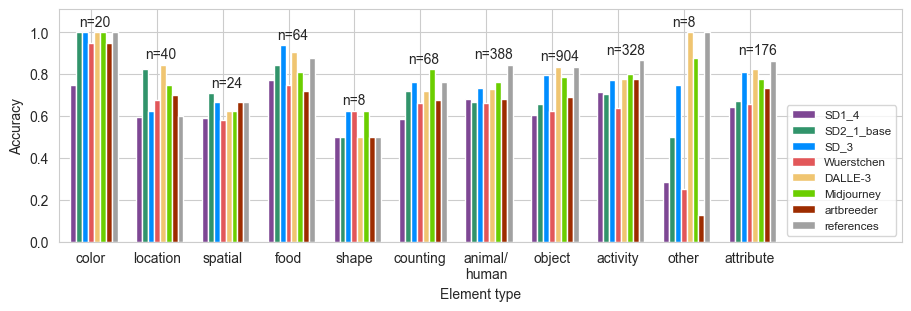

In [60]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# https://seaborn.pydata.org/tutorial/color_palettes.html
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

x = np.arange(len(element_types))  # the label locations
width = 0.09  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_figheight(3)
fig.set_figwidth(9)
#ax.set_prop_cycle("color", sns.color_palette("magma", len(model_elements_count)))
#ax.set_prop_cycle("color", sns.color_palette("bright", len(model_elements_count)))
#ax.set_prop_cycle("color", ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', "#dede00", '#a65628', '#999999'])
#ax.set_prop_cycle("color", ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', "#9467bd", '#8c564b', '#e377c2', '#999999'])
# https://www.simplifiedsciencepublishing.com/resources/best-color-palettes-for-scientific-figures-and-data-visualizations
ax.set_prop_cycle("color", ['#003a7d', '#d83034', '#008dff',
                            #'#f9e858', 
                            '#ff73b6', "#4ecb8d", '#ff9d3a', '#c701ff', "#a1a1a1"])
ax.set_prop_cycle("color", ['7e4794', '#31946B', '#008dff', '#e25759', "#f0c571", '#6BCE00', '#9d2c00', '#a1a1a1'])
#ax.set_prop_cycle("color", "cmyk")

for model, model_elements in model_elements_count.items():
    accuracies = [model_elements_score[model][element] / count if count > 0 else 0 for element, count in model_elements.items()]
    offset = width * multiplier
    rects = ax.bar(x - 2*width + offset, accuracies, width, label=model)
    #ax.bar_label(rects, padding=7)
    multiplier += 1
    
for i, element in enumerate(element_types):
    element_vals = [model_elements_score[model][element] / model_elements[element] if model_elements[element] > 0 else 0 for model, model_elements in model_elements_count.items()]
    ax.text(i - width, max(element_vals) + 0.03, f"n={model_elements_count['SD_3'][element]}")
#for i, count in enumerate(model_elements_count["SD_3"].values()):
#    ax.text(i - width, 1.1, f"n={count}")
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Element type')
ax.set_xticks(x + width, [e.replace('/','/\n') for e in element_types])
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.11)
ax.set_xlim(-0.4, 12.4)#10.7)
#plt.legend(loc="center", ncols=2)
plt.legend(fontsize="small", loc="lower right", ncols=1)

plt.savefig("../figures/tifa_score_elements.pdf")

## Sort by image category

In [1]:
import pandas as pd

tifa_scores_mplug = pd.read_csv("tifa_scores_mplug.csv")
ls_bilder = pd.read_csv("../sampled_data_fixed.csv")

In [7]:
ls_bilder = ls_bilder.rename(columns={"english_name": 'name'})

tifa_infos = tifa_scores_mplug.merge(ls_bilder)
tifa_infos

,name,model,id,description,tifa_score,question_details,category,english_description,image_url,prompt,german_name,german_description
0,Endometriosis,DALLE-3,0,This is a chronic condition in women where the...,0.00,{'all_black': True},Erkrankung/Krankheitsbild,This is a chronic condition in women where the...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Endometriosis - This is a c...,Endometriose,"Das ist eine chronische Erkrankung bei Frauen,..."
1,Endometriosis,DALLE-3,1,This is a chronic condition in women where the...,0.00,{'all_black': True},Erkrankung/Krankheitsbild,This is a chronic condition in women where the...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Endometriosis - This is a c...,Endometriose,"Das ist eine chronische Erkrankung bei Frauen,..."
2,Endometriosis,DALLE-3,2,This is a chronic condition in women where the...,0.00,{'all_black': True},Erkrankung/Krankheitsbild,This is a chronic condition in women where the...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Endometriosis - This is a c...,Endometriose,"Das ist eine chronische Erkrankung bei Frauen,..."
3,Endometriosis,DALLE-3,3,This is a chronic condition in women where the...,0.00,{'all_black': True},Erkrankung/Krankheitsbild,This is a chronic condition in women where the...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Endometriosis - This is a c...,Endometriose,"Das ist eine chronische Erkrankung bei Frauen,..."
4,Exchange on the Internet,DALLE-3,0,"In the middle, there is a globe depicted. Arou...",1.00,{'are there individuals depicted?': {'caption'...,Vereinsarbeit,"In the middle, there is a globe depicted. Arou...",https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Exchange on the Internet - ...,Austausch im Internet,In der Mitte ist eine Weltkugel abgebildet. Au...
...,...,...,...,...,...,...,...,...,...,...,...,...
2292,Being Deaf,SD_3,3,Depicted are two persons facing each other. On...,0.80,{'is one person communicating in sign language...,Kognitive Faehigkeiten/Zustand,Depicted are two persons facing each other. On...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Being Deaf - Depicted are t...,Gehoerlos sein,Abgebildet sind zwei Personen die einander zug...
2293,Being Blind,SD_3,0,Depicted is a man holding a long cane in his h...,0.50,{'is the man holding a cane?': {'caption': 'De...,Kognitive Faehigkeiten/Zustand,Depicted is a man holding a long cane in his h...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Being Blind - Depicted is a...,Blind sein,"Abgebildet ist ein Mann, der einen Langstock i..."
2294,Being Blind,SD_3,1,Depicted is a man holding a long cane in his h...,0.50,{'is the man holding a cane?': {'caption': 'De...,Kognitive Faehigkeiten/Zustand,Depicted is a man holding a long cane in his h...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Being Blind - Depicted is a...,Blind sein,"Abgebildet ist ein Mann, der einen Langstock i..."
2295,Being Blind,SD_3,2,Depicted is a man holding a long cane in his h...,0.75,{'is the man holding a cane?': {'caption': 'De...,Kognitive Faehigkeiten/Zustand,Depicted is a man holding a long cane in his h...,https://www.lag-sb-rlp.de/images/phocagallery/...,Cartoon picture of Being Blind - Depicted is a...,Blind sein,"Abgebildet ist ein Mann, der einen Langstock i..."


In [8]:
tifa_infos.groupby(["category"])["tifa_score"].mean()

category
Aerztliche Behandlung               0.697602
Begriffe                            0.850969
Beratung und Information            0.751289
Erkrankung/Krankheitsbild           0.560737
Gefuehle                            0.659163
Gesundheitsbezogene Selbsthilfe     0.695271
Gesundheitsfoerderung               0.708509
Hilfsmittel                         0.653448
Koerper                             0.669425
Koerperlicher Zustand/Beschwerde    0.654238
Kognitive Faehigkeiten/Zustand      0.707567
Personen                            0.796502
Taetigkeiten                        0.730493
Vereinsarbeit                       0.760796
Verhalten                           0.663416
Wohnen                              0.765517
Name: tifa_score, dtype: float64

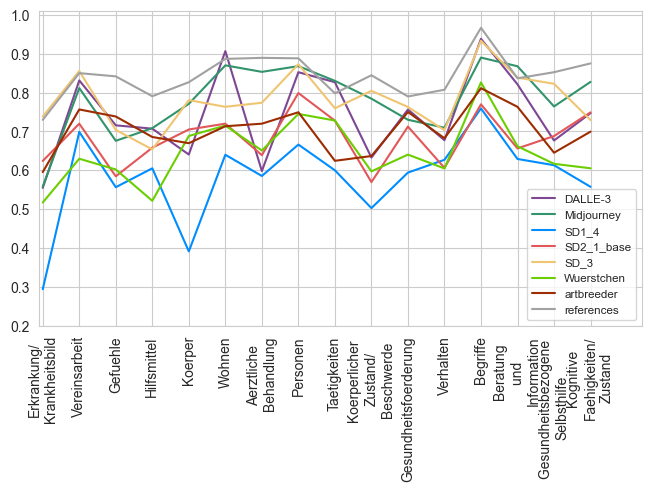

In [20]:
import matplotlib.pyplot as plt

categories = tifa_infos["category"].unique()
fig, ax = plt.subplots(layout='constrained')
#fig.set_figheight(3)
#fig.set_figwidth(9)
ax.set_prop_cycle("color", ['7e4794', '#31946B', '#008dff', '#e25759', "#f0c571", '#6BCE00', '#9d2c00', '#a1a1a1'])

for model, scores in tifa_infos.groupby(["model"]):
    category_avg = [scores[scores.category == category]["tifa_score"].mean() for category in categories]
    ax.plot(category_avg, label=model)
    
ax.set_xticks(list(range(len(categories))), [c.replace('/', '/\n').replace(' ', ' \n') for c in categories])
ax.tick_params(axis='x', labelrotation=90)

ax.set_ylim(0.2, 1.01)
ax.set_xlim(-0.1, 16.4)#10.7)
#plt.legend(loc="center", ncols=2)
plt.legend(fontsize="small", loc="lower right", ncols=1)
plt.show()

## Select best tifa images / image

In [33]:
tifa_scores_mplug

,name,model,id,description,tifa_score,question_details
4,Exchange on the Internet,DALLE-3,0,"In the middle, there is a globe depicted. Arou...",1.000,{'are there individuals depicted?': {'caption'...
5,Exchange on the Internet,DALLE-3,1,"In the middle, there is a globe depicted. Arou...",1.000,{'are there individuals depicted?': {'caption'...
6,Exchange on the Internet,DALLE-3,2,"In the middle, there is a globe depicted. Arou...",1.000,{'are there individuals depicted?': {'caption'...
7,Exchange on the Internet,DALLE-3,3,"In the middle, there is a globe depicted. Arou...",1.000,{'are there individuals depicted?': {'caption'...
8,Despair,DALLE-3,0,A woman covers her face with both hands. She c...,0.875,{'who is covering her face with both hands?': ...
...,...,...,...,...,...,...
2317,Being Deaf,SD_3,3,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...
2318,Being Blind,SD_3,0,Depicted is a man holding a long cane in his h...,0.500,{'is the man holding a cane?': {'caption': 'De...
2319,Being Blind,SD_3,1,Depicted is a man holding a long cane in his h...,0.500,{'is the man holding a cane?': {'caption': 'De...
2320,Being Blind,SD_3,2,Depicted is a man holding a long cane in his h...,0.750,{'is the man holding a cane?': {'caption': 'De...


In [38]:
tifa_scores_mplug.groupby(["name", "model"]).apply(lambda x: x.nlargest(1, "tifa_score")).reset_index(drop=True)

C:\Users\Miriam\AppData\Local\Temp\ipykernel_12988\684293908.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tifa_scores_mplug.groupby(["name", "model"]).apply(lambda x: x.nlargest(1, "tifa_score")).reset_index(drop=True)


,name,model,id,description,tifa_score,question_details
0,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
1,Adult with Heart Defect,Midjourney,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
2,Adult with Heart Defect,SD1_4,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
3,Adult with Heart Defect,SD2_1_base,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
4,Adult with Heart Defect,SD_3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
...,...,...,...,...,...,...
628,Yoga,SD2_1_base,0,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...
629,Yoga,SD_3,0,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...
630,Yoga,Wuerstchen,2,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...
631,Yoga,artbreeder,2,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...


In [45]:
idx = tifa_scores_mplug.groupby(["name", "model"])["tifa_score"].idxmax()
tifa_scores_mplug.loc[idx]

,name,model,id,description,tifa_score,question_details
143,Adult with Heart Defect,DALLE-3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
454,Adult with Heart Defect,Midjourney,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
1101,Adult with Heart Defect,SD1_4,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
1426,Adult with Heart Defect,SD2_1_base,1,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
2154,Adult with Heart Defect,SD_3,0,A man looks down at his chest. His heart is de...,1.0,{'who is looking down at his chest?': {'captio...
...,...,...,...,...,...,...
1441,Yoga,SD2_1_base,0,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...
2170,Yoga,SD_3,0,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...
1767,Yoga,Wuerstchen,2,"Three people are shown on mats, and one person...",0.8,{'who is on mats?': {'caption': 'Three people ...
795,Yoga,artbreeder,2,"Three people are shown on mats, and one person...",0.6,{'who is on mats?': {'caption': 'Three people ...


In [2]:
max_tifas = tifa_scores_mplug.loc[tifa_scores_mplug.groupby(["name", "model"])["tifa_score"].transform(max) == tifa_scores_mplug["tifa_score"]]
max_tifas = max_tifas[max_tifas.model != "references"]
max_tifas

C:\Users\Miriam\AppData\Local\Temp\ipykernel_2056\3317303043.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_tifas = tifa_scores_mplug.loc[tifa_scores_mplug.groupby(["name", "model"])["tifa_score"].transform(max) == tifa_scores_mplug["tifa_score"]]


,name,model,id,description,tifa_score,question_details
0,Endometriosis,DALLE-3,0,This is a chronic condition in women where the...,0.000,{'all_black': True}
1,Endometriosis,DALLE-3,1,This is a chronic condition in women where the...,0.000,{'all_black': True}
2,Endometriosis,DALLE-3,2,This is a chronic condition in women where the...,0.000,{'all_black': True}
3,Endometriosis,DALLE-3,3,This is a chronic condition in women where the...,0.000,{'all_black': True}
4,Exchange on the Internet,DALLE-3,0,"In the middle, there is a globe depicted. Arou...",1.000,{'are there individuals depicted?': {'caption'...
...,...,...,...,...,...,...
2311,Poor Memory Performance,SD_3,1,A woman holds her forehead thoughtfully. Quest...,0.875,{'who is holding her forehead thoughtfully?': ...
2314,Being Deaf,SD_3,0,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...
2316,Being Deaf,SD_3,2,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...
2317,Being Deaf,SD_3,3,Depicted are two persons facing each other. On...,0.800,{'is one person communicating in sign language...


In [ ]:
import shutil

models = {
    "DALLE-3": ".jpg",
    "Midjourney": ".png",
    "artbreeder": ".jfif",
    "SD1_4": ".png",
    "SD2_1_base": ".png",
    "Wuerstchen": ".png",
    #"references/": ".jpg",
    "SD_3": ".png"
}

for _, row in max_tifas.iterrows():
    model = row['model']
    img_name = f"{row['name'].replace(' ', '_')}_{row['id']}"
    shutil.copy(f"../images/{model}/{img_name}{models[model]}", f"../images/best/{model}_{img_name}.png")

## Investigate TIFA score

In [3]:
description = "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write."
llama2_questions = [{'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'arms', 'question': 'what part of the body is recognizable?', 'choices': ['arms', 'legs', 'hands', 'feet'], 'answer': 'arms', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'persons', 'question': 'are there persons?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'animal/human'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'persons', 'question': 'who are in the picture?', 'choices': ['persons', 'animals', 'robots', 'aliens'], 'answer': 'persons', 'element_type': 'animal/human'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'word', 'question': 'is there a word written on top of a document?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'word', 'question': 'what is written on top of a document?', 'choices': ['word', 'sentence', 'paragraph', 'story'], 'answer': 'word', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'document', 'question': 'is there a document?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'document', 'question': 'what type of document is this?', 'choices': ['document', 'book', 'magazine', 'newspaper'], 'answer': 'document', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'pen', 'question': 'is there a pen?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'pen', 'question': 'what type of writing instrument is this?', 'choices': ['pen', 'pencil', 'marker', 'crayon'], 'answer': 'pen', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'pointing', 'question': "is one person pointing to the word 'Application' written on top of a document?", 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity'}]

filtered_questions = [{'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'persons', 'question': 'are there persons?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'animal/human'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'persons', 'question': 'who are in the picture?', 'choices': ['persons', 'animals', 'robots', 'aliens'], 'answer': 'persons', 'element_type': 'animal/human'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'word', 'question': 'is there a word written on top of a document?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'document', 'question': 'is there a document?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'pen', 'question': 'is there a pen?', 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'pen', 'question': 'what type of writing instrument is this?', 'choices': ['pen', 'pencil', 'marker', 'crayon'], 'answer': 'pen', 'element_type': 'object'}, {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.", 'element': 'pointing', 'question': "is one person pointing to the word 'Application' written on top of a document?", 'choices': ['yes', 'no'], 'answer': 'yes', 'element_type': 'activity'}]

In [1]:
from tifascore import tifa_score_single, VQAModel

vqa_model = VQAModel("mplug-large")

Loading mplug-large...


2024-07-24 18:15:02,610 - modelscope - WARNING - Model revision not specified, use revision: v1.0.0
2024-07-24 18:15:03,283 - modelscope - INFO - initiate model from C:\Users\Miriam\.cache\modelscope\hub\damo\mplug_visual-question-answering_coco_large_en
2024-07-24 18:15:03,285 - modelscope - INFO - initiate model from location C:\Users\Miriam\.cache\modelscope\hub\damo\mplug_visual-question-answering_coco_large_en.
2024-07-24 18:15:03,290 - modelscope - INFO - initialize model from C:\Users\Miriam\.cache\modelscope\hub\damo\mplug_visual-question-answering_coco_large_en
D:\Documents\workspaces\PyCharm projects\ExplainImageGen\vision_venv\lib\site-packages\transformers\tokenization_utils_base.py:2057: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


load checkpoint from C:\Users\Miriam\.cache\modelscope\hub\damo\mplug_visual-question-answering_coco_large_en\pytorch_model.bin
<All keys matched successfully>
Finish loading mplug-large
Using SBERT on GPU


In [4]:
from PIL import Image

image = Image.open("../images/DALLE-3/Application_0.jpg")

tifa_res = tifa_score_single(vqa_model, filtered_questions, image)
tifa_res

  0%|          | 0/7 [00:00<?, ?it/s]D:\Documents\workspaces\PyCharm projects\ExplainImageGen\vision_venv\lib\site-packages\torch\utils\checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
D:\Documents\workspaces\PyCharm projects\ExplainImageGen\vision_venv\lib\site-packages\torch\utils\checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
D:\Documents\workspaces\PyCharm projects\ExplainImageGen\vision_venv\lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\s

[1, 1, 1, 1, 1, 1, 1] 1


{'tifa_score': 1,
 'question_details': {'are there persons?': {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.",
   'element': 'persons',
   'question': 'are there persons?',
   'choices': ['yes', 'no'],
   'answer': 'yes',
   'element_type': 'animal/human',
   'free_form_vqa': 'yes',
   'multiple_choice_vqa': 'yes',
   'scores': 1},
  'who are in the picture?': {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.",
   'element': 'persons',
   'question': 'who are in the picture?',
   'choices': ['persons', 'animals', 'robots', 'aliens'],
   'answer': 'persons',
   'element_type': 'animal/human',
   'free_form_vqa': 'people',
   'multiple_choice_vqa': 'persons',
   'scores': 1},
  'is there a word written on top of a documen

In [6]:
from PIL import Image

image = Image.open("../images/Midjourney/Application_2.png")

tifa_res = tifa_score_single(vqa_model, filtered_questions, image)
tifa_res

100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

[1, 1, 1, 1, 1, 1, 1] 1


{'tifa_score': 1,
 'question_details': {'are there persons?': {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.",
   'element': 'persons',
   'question': 'are there persons?',
   'choices': ['yes', 'no'],
   'answer': 'yes',
   'element_type': 'animal/human',
   'free_form_vqa': 'yes',
   'multiple_choice_vqa': 'yes',
   'scores': 1},
  'who are in the picture?': {'caption': "The arms of two persons are recognizable. One person is pointing to the word 'Application' written on top of a document. The other person is holding a pen ready to write.",
   'element': 'persons',
   'question': 'who are in the picture?',
   'choices': ['persons', 'animals', 'robots', 'aliens'],
   'answer': 'persons',
   'element_type': 'animal/human',
   'free_form_vqa': 'people',
   'multiple_choice_vqa': 'persons',
   'scores': 1},
  'is there a word written on top of a documen